In [ ]:
import missingno         as msno
import pandas            as pd
import numpy             as np
import matplotlib.pyplot as plt
import seaborn           as sns
import warnings
import copy
import os
import glob
warnings.filterwarnings('ignore')
pd.options.display.max_columns = 100
from scipy import stats

%matplotlib inline

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
# libraries for Linear regression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import linear_model
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from scipy import stats
from statsmodels.api import OLS

In [ ]:
# libraries for NN
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.neural_network import MLPRegressor
from keras.models import load_model
import keras.backend as K

In [ ]:
#PyDirectory = r'drive/Shareddrives/DS4W-Team/NN'
#OutDirectory = PyDirectory+"/Results"
#if not os.path.exists(OutDirectory):
#    os.mkdir(OutDirectory)
    
PyDirectory = '/Users/laurashelley/Documents/ds4a/capstone/code/NN'#/Documents/ds4a/capstone/code/NN'
OutDirectory = PyDirectory+"/Results"
if not os.path.exists(OutDirectory):
    os.mkdir(OutDirectory)

In [ ]:
# read cleaned data
#train_median_pop = pd.read_csv('drive/Shareddrives/DS4W-Team/Data/train_median_pop.csv', delimiter=',')
train_clean = pd.read_csv('/Users/laurashelley/Documents/ds4a/capstone/code/NN/train_38_predictors.csv', index_col=0)
train_clean

,1_avg,facility_type_facility_group_18,facility_type_facility_group_16,facility_type_facility_group_0,temp_year_span,State_Factor_State_6,facility_type_facility_group_3,facility_type_facility_group_4,facility_type_facility_group_15,facility_type_facility_group_8,facility_type_facility_group_13,facility_type_facility_group_7,facility_type_facility_group_10,facility_type_facility_group_20,facility_type_facility_group_19,facility_type_facility_group_21,facility_type_facility_group_9,facility_type_facility_group_6,heating_degree_days,facility_type_facility_group_5,facility_type_facility_group_23,facility_type_facility_group_22,precipitation_inches,facility_type_facility_group_14,age,building_class_Commercial,building_class_Residential,floor_area,facility_type_facility_group_12,facility_type_facility_group_24,facility_type_facility_group_1,3_min,facility_type_facility_group_11,avg_temp,State_Factor_State_2,State_Factor_State_11,days_above_100F,ELEVATION,site_eui
0,50.500000,0.0,1.0,0.0,4964.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2960,0.0,0.0,0.0,16.59,0.0,80.0,1.0,0.0,4.787049,0.0,0.0,0.0,41,0.0,56.972603,0.0,0.0,0,2.4,248.682615
1,50.500000,0.0,0.0,0.0,4964.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2960,0.0,0.0,0.0,16.59,0.0,67.0,1.0,0.0,5.437751,0.0,0.0,0.0,41,0.0,56.972603,0.0,0.0,0,1.8,26.500150
2,50.500000,0.0,0.0,0.0,4964.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2960,0.0,0.0,0.0,16.59,0.0,71.0,1.0,0.0,5.447197,0.0,0.0,0.0,41,0.0,56.972603,0.0,0.0,0,1.8,24.693619
3,50.500000,0.0,0.0,0.0,4964.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2960,1.0,0.0,0.0,16.59,0.0,42.0,1.0,0.0,4.742921,0.0,0.0,0.0,41,0.0,56.972603,0.0,0.0,0,1.8,48.406926
4,50.500000,0.0,0.0,0.0,4964.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2960,0.0,0.0,0.0,16.59,0.0,37.0,1.0,0.0,4.819544,0.0,0.0,0.0,41,0.0,56.972603,0.0,0.0,0,2.4,3.899395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75752,43.451613,0.0,0.0,0.0,4964.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3772,0.0,0.0,0.0,45.03,0.0,27.0,1.0,0.0,4.309843,0.0,0.0,0.0,39,0.0,55.147541,0.0,1.0,0,36.6,132.918411
75753,43.451613,0.0,0.0,0.0,4964.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3772,0.0,0.0,0.0,45.03,0.0,112.0,0.0,1.0,4.607337,0.0,0.0,0.0,39,0.0,55.147541,0.0,1.0,0,36.6,39.483672
75754,36.612903,0.0,0.0,0.0,4964.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,6218,0.0,0.0,0.0,106.32,0.0,105.0,1.0,0.0,4.448273,0.0,0.0,0.0,34,0.0,47.911202,0.0,1.0,0,36.6,48.404398
75755,36.612903,0.0,0.0,0.0,4964.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,6218,0.0,0.0,0.0,106.32,0.0,10.0,1.0,0.0,4.728962,0.0,0.0,0.0,34,0.0,47.911202,0.0,1.0,0,36.6,592.022750


In [ ]:
# Transform categorical variables to dummies

# train_median_pop['Year_Factor'] = train_median_pop['Year_Factor'].astype('object')   -> this line is commented so Year_Factor is kept as a numeric feature

Categorical_features = train_clean.select_dtypes(include='object').columns.to_list()
Numerical_features = train_clean.select_dtypes(include='number').columns.to_list()

print('Categorical Features:', Categorical_features, '\n')
print('Numerical Features:', Numerical_features)
x_cat = train_clean[Categorical_features]

enc = OneHotEncoder(handle_unknown='ignore')
enc.fit(x_cat)

x_cat_arr = enc.transform(x_cat).toarray()

x_cat_df = pd.DataFrame(x_cat_arr, columns = enc.get_feature_names(Categorical_features))
x_cat_df
train_clean = pd.concat([train_clean, x_cat_df], axis = 1).drop(Categorical_features, axis = 1)
train_clean

Categorical Features: [] 

Numerical Features: ['1_avg', 'facility_type_facility_group_18', 'facility_type_facility_group_16', 'facility_type_facility_group_0', 'temp_year_span', 'State_Factor_State_6', 'facility_type_facility_group_3', 'facility_type_facility_group_4', 'facility_type_facility_group_15', 'facility_type_facility_group_8', 'facility_type_facility_group_13', 'facility_type_facility_group_7', 'facility_type_facility_group_10', 'facility_type_facility_group_20', 'facility_type_facility_group_19', 'facility_type_facility_group_21', 'facility_type_facility_group_9', 'facility_type_facility_group_6', 'heating_degree_days', 'facility_type_facility_group_5', 'facility_type_facility_group_23', 'facility_type_facility_group_22', 'precipitation_inches', 'facility_type_facility_group_14', 'age', 'building_class_Commercial', 'building_class_Residential', 'floor_area', 'facility_type_facility_group_12', 'facility_type_facility_group_24', 'facility_type_facility_group_1', '3_min', 'fac

,1_avg,facility_type_facility_group_18,facility_type_facility_group_16,facility_type_facility_group_0,temp_year_span,State_Factor_State_6,facility_type_facility_group_3,facility_type_facility_group_4,facility_type_facility_group_15,facility_type_facility_group_8,facility_type_facility_group_13,facility_type_facility_group_7,facility_type_facility_group_10,facility_type_facility_group_20,facility_type_facility_group_19,facility_type_facility_group_21,facility_type_facility_group_9,facility_type_facility_group_6,heating_degree_days,facility_type_facility_group_5,facility_type_facility_group_23,facility_type_facility_group_22,precipitation_inches,facility_type_facility_group_14,age,building_class_Commercial,building_class_Residential,floor_area,facility_type_facility_group_12,facility_type_facility_group_24,facility_type_facility_group_1,3_min,facility_type_facility_group_11,avg_temp,State_Factor_State_2,State_Factor_State_11,days_above_100F,ELEVATION,site_eui
0,50.500000,0.0,1.0,0.0,4964.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2960,0.0,0.0,0.0,16.59,0.0,80.0,1.0,0.0,4.787049,0.0,0.0,0.0,41,0.0,56.972603,0.0,0.0,0,2.4,248.682615
1,50.500000,0.0,0.0,0.0,4964.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,2960,0.0,0.0,0.0,16.59,0.0,67.0,1.0,0.0,5.437751,0.0,0.0,0.0,41,0.0,56.972603,0.0,0.0,0,1.8,26.500150
2,50.500000,0.0,0.0,0.0,4964.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2960,0.0,0.0,0.0,16.59,0.0,71.0,1.0,0.0,5.447197,0.0,0.0,0.0,41,0.0,56.972603,0.0,0.0,0,1.8,24.693619
3,50.500000,0.0,0.0,0.0,4964.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2960,1.0,0.0,0.0,16.59,0.0,42.0,1.0,0.0,4.742921,0.0,0.0,0.0,41,0.0,56.972603,0.0,0.0,0,1.8,48.406926
4,50.500000,0.0,0.0,0.0,4964.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2960,0.0,0.0,0.0,16.59,0.0,37.0,1.0,0.0,4.819544,0.0,0.0,0.0,41,0.0,56.972603,0.0,0.0,0,2.4,3.899395
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75752,43.451613,0.0,0.0,0.0,4964.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3772,0.0,0.0,0.0,45.03,0.0,27.0,1.0,0.0,4.309843,0.0,0.0,0.0,39,0.0,55.147541,0.0,1.0,0,36.6,132.918411
75753,43.451613,0.0,0.0,0.0,4964.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3772,0.0,0.0,0.0,45.03,0.0,112.0,0.0,1.0,4.607337,0.0,0.0,0.0,39,0.0,55.147541,0.0,1.0,0,36.6,39.483672
75754,36.612903,0.0,0.0,0.0,4964.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,6218,0.0,0.0,0.0,106.32,0.0,105.0,1.0,0.0,4.448273,0.0,0.0,0.0,34,0.0,47.911202,0.0,1.0,0,36.6,48.404398
75755,36.612903,0.0,0.0,0.0,4964.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,6218,0.0,0.0,0.0,106.32,0.0,10.0,1.0,0.0,4.728962,0.0,0.0,0.0,34,0.0,47.911202,0.0,1.0,0,36.6,592.022750


In [ ]:
# Normalizing the data (feature scaling)

x = train_clean.loc[:, train_clean.columns != 'site_eui']
y = train_clean['site_eui']

scaler = StandardScaler()
scaler_x = scaler.fit(x)
x_n = scaler_x.fit_transform(x)
scaler_y = scaler.fit(pd.DataFrame(y))
y_n = scaler_y.fit_transform(pd.DataFrame(y))

print(x_n.shape,y_n.shape)

(75757, 38) (75757, 1)


In [ ]:
# split data to train data and test data
X_train , X_test, Y_train , Y_test = train_test_split(x_n , y_n, test_size=0.1, random_state=17)
print(X_train.shape,X_test.shape)

(68181, 38) (7576, 38)


In [ ]:
# compile a NN with 4 hidden layers, each 20 neurons
model_NN = Sequential()
n_cols = X_train.shape[1]
print(n_cols)
model_NN.add(Dense(20,activation='relu',input_shape=(n_cols,)))
model_NN.add(Dense(20,activation='relu'))
model_NN.add(Dense(20,activation='relu'))
model_NN.add(Dense(20,activation='relu'))
model_NN.add(Dense(1))
#optimizer = keras.optimizer_v2.adam.Adam(0.001)
optimizer = 'adam'
model_NN.compile(optimizer=optimizer,loss='mean_absolute_error')

38


In [ ]:
# load weights if the model is ran previously
weightsdir='/weights_1'
if not os.path.exists(OutDirectory+weightsdir):
    os.mkdir(OutDirectory+weightsdir)
txt= glob.glob(OutDirectory+weightsdir+'/best.h5')
VOld=len(txt)
VNew=len(txt)+1
print('modelinv old=',VOld)
if VOld!=0:
    model_NN.load_weights(OutDirectory+weightsdir+'/best.h5')
    trained_inv=1
else:
    trained_inv=0

modelinv old= 0


In [ ]:
my_callbacks = [
    # tf.keras.callbacks.EarlyStopping(patience=200),
    tf.keras.callbacks.ModelCheckpoint(filepath=OutDirectory+weightsdir+'/best.h5',#.{epoch:02d}-{loss:.2f}.h5',
                                             verbose=0, monitor='loss', save_best_only=True,
                                             save_weights_only=True,),
    # tf.keras.callbacks.TensorBoard(log_dir='./logs'),
]

In [ ]:
# train NN using full batch 
# h = model_NN.fit(X_train,Y_train,batch_size=70000,epochs=1000,callbacks=my_callbacks)
#h = model_NN.fit(X_train,Y_train,batch_size=70,epochs=100,callbacks=my_callbacks)
h = model_NN.fit(X_train,Y_train,epochs=100,callbacks=my_callbacks) #full batch

Epoch 1/100
68181/68181 [==============================] - 3s 44us/step - loss: 0.4745
Epoch 2/100
68181/68181 [==============================] - 2s 36us/step - loss: 0.4627
Epoch 3/100
68181/68181 [==============================] - 2s 36us/step - loss: 0.4605
Epoch 4/100
68181/68181 [==============================] - 2s 37us/step - loss: 0.4590
Epoch 5/100
68181/68181 [==============================] - 3s 37us/step - loss: 0.4580
Epoch 6/100
68181/68181 [==============================] - 2s 36us/step - loss: 0.4574
Epoch 7/100
68181/68181 [==============================] - 2s 36us/step - loss: 0.4564
Epoch 8/100
68181/68181 [==============================] - 2s 36us/step - loss: 0.4557
Epoch 9/100
68181/68181 [==============================] - 2s 36us/step - loss: 0.4550
Epoch 10/100
68181/68181 [==============================] - 2s 36us/step - loss: 0.4544
Epoch 11/100
68181/68181 [==============================] - 3s 37us/step - loss: 0.4540
Epoch 12/100
68181/68181 [===============

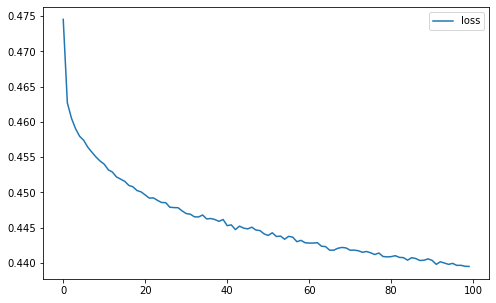

In [ ]:
# plot loss evolution
pd.DataFrame(h.history).plot(figsize=(8, 5))
# plt.gca().set_ylim(0, 1) 
plt.show()

In [ ]:
model_NN.save(OutDirectory+weightsdir+'/model.h5')

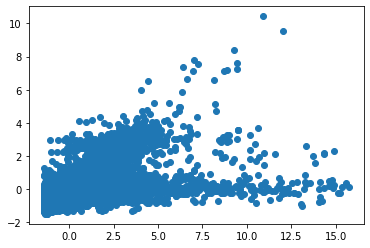

In [ ]:
Y_train_pred = model_NN.predict(X_train)
plt.scatter(Y_train,Y_train_pred)